<a href="https://colab.research.google.com/github/compustar/practical_data_science/blob/master/hk_local.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import dependencies

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

Initialize variables

In [ ]:
data = np.asarray([[9,39],[4,75],[34,83],[32,116],[29,118],[30,88],[21,88],[15,112],[37,120],[15,114],[19,139],[63,147],[60,198],[46,219],[60,177],[78,177],[83,197],[63,131],[85,175],[80,138],[73,134],[90,173],[73,168],[60,143],[53,177]], dtype=np.uint8)
X = data[:,0]
# X = data
Y = np.asarray([19,34,32,16,30,41,40,14,63,50,60,82,66,58,102,110,115,98,113,145,118,124,113,80,75], dtype=np.uint8)


Prepare the model

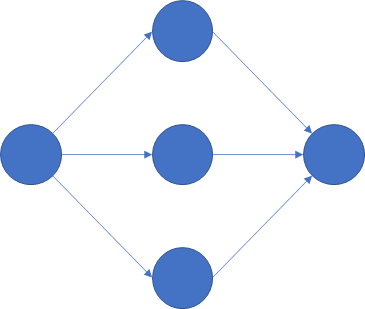

In [ ]:
model = keras.Sequential([
    layers.Dense(3, input_shape=[1]),
    layers.Dense(1)
])
optimizer = keras.optimizers.Adam()

model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])
print(model.summary())

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 3)                 6         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4         
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________
None


Train with data

In [ ]:
model.fit(X, Y, epochs=1000, validation_split = 0.2, callbacks=[early_stop])

Epoch 1/1000
1/1 [==============================] - 0s 117ms/step - loss: 1481.2371 - mae: 32.5223 - mse: 1481.2371 - val_loss: 2527.6145 - val_mae: 48.8344 - val_mse: 2527.6145
Epoch 2/1000
1/1 [==============================] - 0s 18ms/step - loss: 1468.1614 - mae: 32.3696 - mse: 1468.1614 - val_loss: 2500.9563 - val_mae: 48.5697 - val_mse: 2500.9563
Epoch 3/1000
1/1 [==============================] - 0s 15ms/step - loss: 1455.1678 - mae: 32.2170 - mse: 1455.1678 - val_loss: 2474.4644 - val_mae: 48.3052 - val_mse: 2474.4644
Epoch 4/1000
1/1 [==============================] - 0s 15ms/step - loss: 1442.2577 - mae: 32.0646 - mse: 1442.2577 - val_loss: 2448.1411 - val_mae: 48.0409 - val_mse: 2448.1411
Epoch 5/1000
1/1 [==============================] - 0s 17ms/step - loss: 1429.4324 - mae: 31.9122 - mse: 1429.4324 - val_loss: 2421.9895 - val_mae: 47.7770 - val_mse: 2421.9895
Epoch 6/1000
1/1 [==============================] - 0s 16ms/step - loss: 1416.6930 - mae: 31.7601 - mse: 1416.6930

See the result

In [ ]:
for i, y in enumerate(model.predict(X)): print(y[0]) 



13.668502
6.5379105
49.32147
46.46923
42.190876
43.61699
30.781925
22.225214
53.599823
22.225214
27.92969
90.6789
86.400536
66.43488
86.400536
112.07068
119.20128
90.6789
122.053505
114.92291
104.94009
129.18411
104.94009
86.400536
76.417725


In [ ]:
model.predict([50])

array([[72.13936]], dtype=float32)